In [55]:
import sys
sys.path.append("../ddsl")
from ddsl import DDSL_phys
from utils import normalize_V, readOBJ
import os
import numpy as np
import torch
from scipy.io import savemat

In [56]:
V, E = readOBJ("mesh/cow.obj") # read input mesh in obj format
D = np.ones((E.shape[0], 1))   # assume constant density
ddsl = DDSL_phys(res=[128]*3, t=[1]*3, j=3, elem_batch=10) # create ddsl object with given resolution and box size

V, E, D = torch.from_numpy(V).cuda(), torch.from_numpy(E).cuda(), torch.from_numpy(D).cuda()
V = normalize_V(V) # normalize vertex to [0,1]
V += 1e-4 * torch.rand_like(V) # add noise to prevent coordinate singularity

f = ddsl(V, E, D) # forward process
f = f.squeeze().detach().cpu().numpy() # move from GPU to CPU

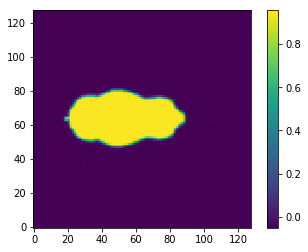

In [57]:
# simple slice plot with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(f[:, 64, :].T, origin='lower')
plt.colorbar()
plt.show()

### Fancier plots in Matlab
Matpotlib does not have good 3D visualization packages. For fancier visualization in Matlab, save the tensor to .mat:
```python
mdict = {"f": f}
savemat("cow.mat", mdict)
```

then use the following matlab script:
```
clear all;clc;
load('cow.mat')
[X,Y,Z] = meshgrid(1:128);

xslice = [64,  0, 0];
yslice = [0 ,  0, 64];
zslice = [0 , 40, 0];

f = permute(f, [1,3,2]);

h = slice(X, Y, Z, f, xslice, yslice, zslice);

hold on
axis equal
axis off
set(h, 'EdgeColor', 'none');
camorbit(-75, 0);
camzoom(1.25);
alpha(.75);
print('cow', '-dpng', '-r300')
```
<img src="../doc/cow.png" alt="cow" width=400>
